In [1]:
from tensorflow.keras.layers import Dense,Concatenate,Input
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [2]:
init=tf.keras.initializers.he_uniform(seed=5)
checkpoint_filepath='Weights\\best.h5'

In [3]:
def model_ind(input_shape,n_classes):
    inp=keras.Input(shape=input_shape)
    x=Dense(units=64,kernel_initializer=init,activation='relu')(inp)
    x=Dense(units=64,kernel_initializer=init,activation='relu')(x)
    x=Dense(units=input_shape[0])(x)
    
    model=keras.Model(inp,x)
    return model

In [4]:
#importing actual image data and edge image data
df1=pd.read_csv('imageData2_NUS_II.csv')
df2=pd.read_csv('imageData4_NUS_II.csv')

In [5]:
df1=df1.iloc[:,1:]
df2=df2.iloc[:,1:]

In [6]:
#creating separate models for original and edge image
n_classes_1=len(np.unique(df1.iloc[:,-1]))
n_classes_2=len(np.unique(df2.iloc[:,-1]))
shape_1=(df1.shape[1]-1,)
shape_2=(df2.shape[1]-1,)
m_1=model_ind(shape_1,n_classes_1)
m_2=model_ind(shape_2,n_classes_2)

In [7]:
input_1=keras.Input(shape=shape_1)
input_2=keras.Input(shape=shape_2)
out_1=m_1(input_1)
out_2=m_2(input_2)

In [8]:
#combining both models
concat=Concatenate()([out_1,out_2])
x=Dense(units=64,kernel_initializer=init,activation='relu')(concat)
x=Dense(units=64,kernel_initializer=init,activation='relu')(concat)
x=Dense(units=n_classes_1,activation='softmax')(x)

model=keras.Model([input_1,input_2],x)

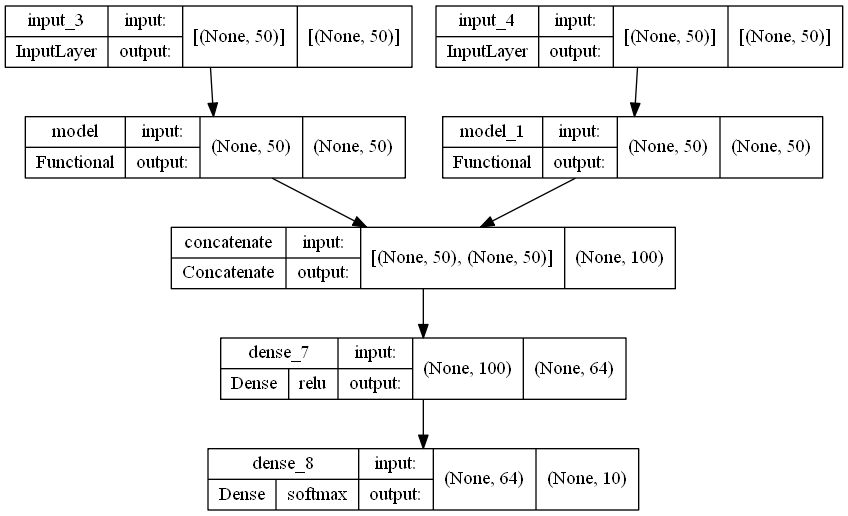

In [9]:
tf.keras.utils.plot_model(model,show_shapes=True,
    show_layer_names=True,show_layer_activations=True)

In [10]:
df=df1.iloc[:,:-1]
df

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,-157.592770,-74.989586,26.090971,-8.345521,20.309082,-41.609432,-46.942642,10.133919,4.060605,18.891779,...,-3.454251,9.745038,2.909431,0.829275,3.246346,-1.524326,-2.273402,2.529419,-4.909801,-0.076046
1,-32.573563,-64.637310,-13.148777,28.762340,-46.249207,5.360273,12.098016,65.122560,68.428604,-6.910601,...,-6.434040,0.990274,1.845026,-0.543798,2.272164,-2.673683,-2.474351,0.246554,6.414862,2.332210
2,148.140910,-14.378835,8.581556,-61.068096,24.337238,-5.487356,-59.486595,11.162739,-51.662323,-3.104277,...,-2.913181,-11.231992,-8.138694,-9.407500,0.560555,3.259718,-10.348706,2.611000,-3.685804,7.775764
3,144.089720,-21.561657,11.013822,-80.428350,-9.660179,0.201761,-46.533432,27.429636,-32.787340,16.571980,...,-9.669357,9.156999,-5.851461,-3.895686,-4.002758,-7.246776,-6.122574,-5.453313,-3.942761,11.678781
4,150.194020,-28.031113,6.727023,-65.739090,-2.161187,8.579575,-28.113130,33.619970,-42.554813,-0.773174,...,2.745528,-1.982156,-0.891602,-1.117146,-4.192959,-2.002299,-4.320318,-0.691694,-1.250791,12.190273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,148.216260,-70.839760,0.150039,-38.240840,-33.879610,-3.681121,-1.311862,2.017831,-21.902912,21.208197,...,3.729400,6.233510,1.968732,2.305927,-6.280079,1.349673,-0.314100,9.450900,-5.597827,-13.537509
1996,126.831635,-60.081820,-18.487612,-43.154730,-26.739977,6.400150,33.023360,-25.981405,-0.138741,60.734478,...,2.767606,-0.802133,-1.961675,-3.174171,5.635267,-4.631125,0.629244,5.634188,5.073952,-7.642568
1997,86.703186,-66.536680,-41.121810,-45.606293,-41.454124,19.843046,3.226535,-43.006160,-5.760996,41.817530,...,1.153323,0.759376,2.289862,-0.101518,11.520275,-4.526203,3.950395,2.533614,4.321910,-8.422306
1998,201.504440,-64.131910,-20.530970,-10.935773,19.823627,0.278490,32.095745,-30.645475,27.962590,10.656074,...,7.251040,8.348253,1.335366,-5.354080,8.525654,-0.263664,0.169686,-3.357801,0.114478,-3.132484


In [11]:
for i in range(50,50+df2.shape[1]):
    l=list(df2.iloc[:,i-50])
    df[str(i+1)]=l
df

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,101
0,-157.592770,-74.989586,26.090971,-8.345521,20.309082,-41.609432,-46.942642,10.133919,4.060605,18.891779,...,-0.891449,-2.085637,0.415658,-0.066266,-4.058819,2.760208,0.242048,0.090258,0.401979,a
1,-32.573563,-64.637310,-13.148777,28.762340,-46.249207,5.360273,12.098016,65.122560,68.428604,-6.910601,...,-0.730365,0.449623,-2.805437,1.017304,1.929979,1.215471,2.568293,0.091166,-0.374102,a
2,148.140910,-14.378835,8.581556,-61.068096,24.337238,-5.487356,-59.486595,11.162739,-51.662323,-3.104277,...,0.139382,-2.017434,2.837436,2.355469,0.260455,5.565678,0.686607,-4.160824,-5.276652,a
3,144.089720,-21.561657,11.013822,-80.428350,-9.660179,0.201761,-46.533432,27.429636,-32.787340,16.571980,...,-4.818535,0.202442,1.169210,0.839999,-0.952671,-0.264309,1.162126,-0.754795,-1.391552,a
4,150.194020,-28.031113,6.727023,-65.739090,-2.161187,8.579575,-28.113130,33.619970,-42.554813,-0.773174,...,-3.863639,1.165547,1.266952,-0.111356,-0.201099,1.165945,-2.364654,1.873890,-1.435864,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,148.216260,-70.839760,0.150039,-38.240840,-33.879610,-3.681121,-1.311862,2.017831,-21.902912,21.208197,...,-2.075954,-0.539235,-0.835808,-0.164360,1.303325,-1.924079,2.312439,-5.267044,-2.243688,j
1996,126.831635,-60.081820,-18.487612,-43.154730,-26.739977,6.400150,33.023360,-25.981405,-0.138741,60.734478,...,-0.438377,0.984600,-0.125548,-2.164092,1.264180,0.275485,2.775669,-1.285487,-0.736928,j
1997,86.703186,-66.536680,-41.121810,-45.606293,-41.454124,19.843046,3.226535,-43.006160,-5.760996,41.817530,...,-0.562611,0.666965,2.059219,-0.061326,-1.407517,0.503426,-2.034171,-1.302096,0.834270,j
1998,201.504440,-64.131910,-20.530970,-10.935773,19.823627,0.278490,32.095745,-30.645475,27.962590,10.656074,...,-4.297287,3.685551,-1.765761,5.241489,-0.019689,-0.007666,-4.083025,-3.041995,-4.311889,j


In [12]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=250/df.shape[0], random_state=42)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = np_utils.to_categorical(y_train)

In [15]:
y_test = le.transform(y_test)
y_test = np_utils.to_categorical(y_test)

In [16]:
#ISL digits
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)]
history=model.fit([X_train.iloc[:,:50],X_train.iloc[:,50:]],y_train,validation_data=([X_test.iloc[:,:50],X_test.iloc[:,50:]],y_test),batch_size=5,epochs=300,callbacks=callbacks)

Epoch 1/300
350/350 [==============================] - 8s 10ms/step - loss: 6.9290 - accuracy: 0.1669 - val_loss: 2.4325 - val_accuracy: 0.1760
Epoch 2/300
350/350 [==============================] - 3s 8ms/step - loss: 2.1054 - accuracy: 0.2589 - val_loss: 2.2225 - val_accuracy: 0.2040
Epoch 3/300
350/350 [==============================] - 3s 7ms/step - loss: 1.8059 - accuracy: 0.3640 - val_loss: 2.1425 - val_accuracy: 0.3240
Epoch 4/300
350/350 [==============================] - 3s 7ms/step - loss: 1.5471 - accuracy: 0.4377 - val_loss: 2.0631 - val_accuracy: 0.2640
Epoch 5/300
350/350 [==============================] - 3s 8ms/step - loss: 1.3136 - accuracy: 0.5200 - val_loss: 1.8789 - val_accuracy: 0.3880
Epoch 6/300
350/350 [==============================] - 3s 8ms/step - loss: 1.0856 - accuracy: 0.6074 - val_loss: 1.8827 - val_accuracy: 0.4200
Epoch 7/300
350/350 [==============================] - 3s 8ms/step - loss: 0.9380 - accuracy: 0.6577 - val_loss: 1.5388 - val_accuracy: 0.512

Epoch 58/300
350/350 [==============================] - 3s 8ms/step - loss: 0.1604 - accuracy: 0.9651 - val_loss: 2.4574 - val_accuracy: 0.7320
Epoch 59/300
350/350 [==============================] - 3s 8ms/step - loss: 0.1677 - accuracy: 0.9646 - val_loss: 2.2800 - val_accuracy: 0.7400
Epoch 60/300
350/350 [==============================] - 3s 7ms/step - loss: 0.1104 - accuracy: 0.9737 - val_loss: 2.6269 - val_accuracy: 0.7400
Epoch 61/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0628 - accuracy: 0.9891 - val_loss: 2.7840 - val_accuracy: 0.7280
Epoch 62/300
350/350 [==============================] - 3s 8ms/step - loss: 0.0751 - accuracy: 0.9829 - val_loss: 2.6767 - val_accuracy: 0.7520
Epoch 63/300
350/350 [==============================] - 3s 8ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 2.4960 - val_accuracy: 0.7440
Epoch 64/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0079 - accuracy: 0.9983 - val_loss: 2.7807 - val_accuracy:

Epoch 115/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 3.3154 - val_accuracy: 0.7840
Epoch 116/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0158 - accuracy: 0.9971 - val_loss: 3.2106 - val_accuracy: 0.7960
Epoch 117/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0314 - accuracy: 0.9943 - val_loss: 3.3240 - val_accuracy: 0.7600
Epoch 118/300
350/350 [==============================] - 2s 7ms/step - loss: 0.1816 - accuracy: 0.9760 - val_loss: 4.0064 - val_accuracy: 0.7280
Epoch 119/300
350/350 [==============================] - 2s 7ms/step - loss: 0.1615 - accuracy: 0.9743 - val_loss: 3.8467 - val_accuracy: 0.7320
Epoch 120/300
350/350 [==============================] - 3s 7ms/step - loss: 0.3257 - accuracy: 0.9537 - val_loss: 3.7940 - val_accuracy: 0.7480
Epoch 121/300
350/350 [==============================] - 3s 7ms/step - loss: 0.1195 - accuracy: 0.9800 - val_loss: 3.9201 - val_ac

Epoch 171/300
350/350 [==============================] - 2s 7ms/step - loss: 1.4222e-06 - accuracy: 1.0000 - val_loss: 3.4987 - val_accuracy: 0.7960
Epoch 172/300
350/350 [==============================] - 2s 7ms/step - loss: 1.2043e-06 - accuracy: 1.0000 - val_loss: 3.5027 - val_accuracy: 0.7960
Epoch 173/300
350/350 [==============================] - 2s 7ms/step - loss: 1.0229e-06 - accuracy: 1.0000 - val_loss: 3.5080 - val_accuracy: 0.7920
Epoch 174/300
350/350 [==============================] - 2s 7ms/step - loss: 8.6817e-07 - accuracy: 1.0000 - val_loss: 3.5113 - val_accuracy: 0.7920
Epoch 175/300
350/350 [==============================] - 2s 7ms/step - loss: 7.3779e-07 - accuracy: 1.0000 - val_loss: 3.5151 - val_accuracy: 0.7960
Epoch 176/300
350/350 [==============================] - 2s 7ms/step - loss: 6.2519e-07 - accuracy: 1.0000 - val_loss: 3.5203 - val_accuracy: 0.7960
Epoch 177/300
350/350 [==============================] - 2s 7ms/step - loss: 5.2969e-07 - accuracy: 1.0000

350/350 [==============================] - 2s 7ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 3.2208 - val_accuracy: 0.8000
Epoch 227/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 3.2148 - val_accuracy: 0.8000
Epoch 228/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 3.2212 - val_accuracy: 0.8040
Epoch 229/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 3.2202 - val_accuracy: 0.8000
Epoch 230/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 3.2267 - val_accuracy: 0.7960
Epoch 231/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 3.2423 - val_accuracy: 0.7960
Epoch 232/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 3.2628 - val_accuracy: 0.8000

350/350 [==============================] - 2s 7ms/step - loss: 0.2064 - accuracy: 0.9743 - val_loss: 5.2129 - val_accuracy: 0.7600
Epoch 283/300
350/350 [==============================] - 3s 7ms/step - loss: 0.1399 - accuracy: 0.9846 - val_loss: 5.5488 - val_accuracy: 0.8040
Epoch 284/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0281 - accuracy: 0.9971 - val_loss: 5.7771 - val_accuracy: 0.8040
Epoch 285/300
350/350 [==============================] - 3s 7ms/step - loss: 0.0117 - accuracy: 0.9983 - val_loss: 4.9636 - val_accuracy: 0.8000
Epoch 286/300
350/350 [==============================] - 2s 7ms/step - loss: 0.0588 - accuracy: 0.9949 - val_loss: 5.6116 - val_accuracy: 0.8080
Epoch 287/300
350/350 [==============================] - 2s 7ms/step - loss: 0.1271 - accuracy: 0.9840 - val_loss: 5.9590 - val_accuracy: 0.7680
Epoch 288/300
350/350 [==============================] - 3s 7ms/step - loss: 0.5570 - accuracy: 0.9611 - val_loss: 5.4900 - val_accuracy: 0.7920

In [17]:
model.load_weights(checkpoint_filepath)
model.evaluate([X_test.iloc[:,:50],X_test.iloc[:,50:]],y_test)

8/8 [==============================] - 0s 8ms/step - loss: 4.5898 - accuracy: 0.8080


[4.589768409729004, 0.8080000281333923]

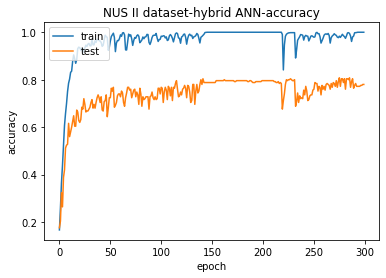

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('NUS II dataset-hybrid ANN-accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

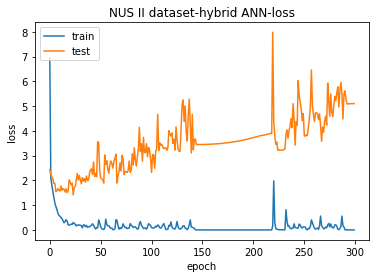

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('NUS II dataset-hybrid ANN-loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()